#Regressão Linear#

Definindo banco de dados e importando bibliotecas

In [1]:
import numpy as np
import math
import numpy.matlib
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import r2_score

N_amostras = 100

X = np.zeros((N_amostras, 1))
Y1 = np.zeros((N_amostras, 1))
Y2 = np.zeros((N_amostras, 1))
Y3 = np.zeros((N_amostras, 1))


X[:,0] = np.array(np.linspace(-5, 5, N_amostras))

for i in range(N_amostras):
  Y1[i] = (math.sin(X[i]) + 5*X[i])
Y2 = X**3
Y3 = (X**2) - 4


Definindo funções

In [2]:
#função de ativação sigmoide
def sigmoidFunc(X):
  return 1./(1 + np.exp(-X))

#função de regressão linear para calculara os y_pred
def polinomDeterm(X, W):
  y_pred = np.zeros((X.shape[0],1))
  x = np.zeros((X.shape[0], W.shape[1]))
  for i in range(X.shape[0]):
    for j in range(W.shape[1]):
      x[i, j] = np.power(X[i,0], j)
      y_pred[i] = y_pred[i] + W[0,j] * x[i,j]
  return y_pred, x

#função gradiente descentende para atualizar os pesos da regressão
def attPesos(X_in, Y, W, n_epoca, learnRate):
  sigX = sigmoidFunc(X_in)
  for epoc in range(n_epoca):
    y_pred, x = polinomDeterm(sigX, W)
    for i in range(Y.shape[0]):
      aux_y = Y[i,:] - y_pred[i,:]
      new_aux_y = np.reshape(aux_y, (1,1))
      transp_x = np.reshape(x[i,:], (1, x[i,:].shape[0]))
      mat_mult = np.matmul(new_aux_y, transp_x)
      N = learnRate*mat_mult
      W = W + N
    if epoc % 100 == 0:
      rmse = np.sqrt(np.mean(np.square(Y - y_pred)))
      print("Epoc: {} rmse:{},".format(epoc, rmse)) #Testando desempenho a cada 100 epocas
  return W

#função para plotar o grafico da função Y e da função y_pred
def plotTwoTrigoGraph(X, Y, Ypred):
  plt.plot(X, Y, 'ro')
  plt.plot(X, Ypred, 'bo')
  plt.grid(True)
  plt.show()

Função main

Epoc: 0 rmse:14.037567110752901,
Epoc: 100 rmse:2.8975044902268428,
Epoc: 200 rmse:2.7234018354942284,
Epoc: 300 rmse:2.67106554812987,
Epoc: 400 rmse:2.643045007392189,
Epoc: 500 rmse:2.6199368709206077,
Epoc: 600 rmse:2.5980158227968086,
Epoc: 700 rmse:2.5765697883836673,
Epoc: 800 rmse:2.5554606896058596,
Epoc: 900 rmse:2.5346596147010634,
Epoc: 1000 rmse:2.514158423835708,
Epoc: 1100 rmse:2.493952946723201,
Epoc: 1200 rmse:2.4740397888580334,
Epoc: 1300 rmse:2.4544157242007074,
Epoc: 1400 rmse:2.435077579416923,
Epoc: 1500 rmse:2.416022211538429,
Epoc: 1600 rmse:2.3972465033851384,
Epoc: 1700 rmse:2.3787473623709,
Epoc: 1800 rmse:2.3605217199610915,
Epoc: 1900 rmse:2.3425665312630066,
Epoc: 2000 rmse:2.3248787746505277,
Epoc: 2100 rmse:2.3074554514044876,
Epoc: 2200 rmse:2.2902935853652364,
Epoc: 2300 rmse:2.273390222596841,
Epoc: 2400 rmse:2.256742431062875,
Epoc: 2500 rmse:2.2403473003138346,
Epoc: 2600 rmse:2.2242019411862612,
Epoc: 2700 rmse:2.2083034855135883,
Epoc: 2800 rmse:

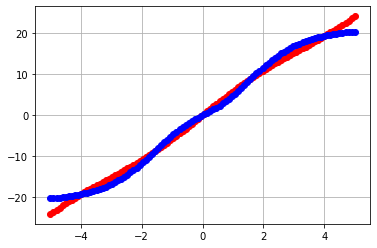

PORCENTAGEM DE ACERTO: 0.9912675066395243


In [3]:
Y = Y1 #alterar a função

M = 4 #número de pesos
W = random.rand(1, M) #definindo pesos aleatoriamente

n_epoca = 25000 #quantidade de epocas
learnRate = 0.01 #taxa de aprendizagem

W = attPesos(X, Y, W, n_epoca, learnRate) #atualização dos dasos com o gradiente descendente

sigX = sigmoidFunc(X) #definindo a função de ativcação sigmoide
y_pred, z = polinomDeterm(sigX, W) #determinando o y_pred
plotTwoTrigoGraph(X, Y, y_pred) #plotando ambas as funções

r2 = r2_score(Y, y_pred) # determinando a taxa de acerto de cada regressão
print("PORCENTAGEM DE ACERTO:",r2)